In [1]:
import tensorflow as tf

## 6. 高级操作
### 6.1 tf.gather和tf.gather_nd
可以实现根据索引号收集数据的目的。

In [2]:
# tf.gather
x = tf.random.uniform([4, 35, 8], maxval = 100, dtype = tf.int32)
y = tf.gather(x, [0,3,5,14,18,23,32], axis = 1)
y.shape

TensorShape([4, 7, 8])

上面的例子中，我们通过第二个维度的索引号，实现了对7个数据的提取

In [3]:
# tf.gather_nd
y = tf.gather_nd(x, [[1,5], [2,32], [3,17]])
y

<tf.Tensor: id=8, shape=(3, 8), dtype=int32, numpy=
array([[81, 89, 70, 89, 56, 10, 57, 69],
       [42, 24, 85,  5, 57, 19, 94, 28],
       [83, 18, 84, 30,  7, 69, 26, 38]])>

上面的例子中，通过tf.gather_nd提取了数据，但是在嵌套列表中，维度的数量必须相同

### 6.2 tf.boolean_mask
一种通过掩码提取数据的方式

In [4]:
# 创建掩码
mask = [True, False, False, True]

# 数据提取
y = tf.boolean_mask(x, mask = mask, axis = 0)
y.shape

TensorShape([2, 35, 8])

上面例子中使用了bool类型的掩码进行数据提取，True的数据进行提取，False不提取。

mask的长度必须与操作维度的长度一致。

In [19]:
# 多维掩码
a = tf.random.uniform([2,3,4], maxval = 10, minval = 1, dtype = tf.int32)

# 创建多维掩码
mask_b = [[True, False, False], [False, False, True]]
b = tf.boolean_mask(a, mask = mask_b)
mask_c = [[[True, False, False, True],[True, False, False, True],[True, False, False, True]],[[True, False, False, True],[True, False, False, True],[True, False, False, True]]]
c = tf.boolean_mask(a, mask = mask_c)
a, b, c

(<tf.Tensor: id=237, shape=(2, 3, 4), dtype=int32, numpy=
 array([[[7, 9, 1, 7],
         [7, 4, 9, 5],
         [4, 1, 2, 5]],
 
        [[6, 2, 5, 6],
         [7, 5, 3, 9],
         [3, 9, 4, 7]]])>,
 <tf.Tensor: id=265, shape=(2, 4), dtype=int32, numpy=
 array([[7, 9, 1, 7],
        [3, 9, 4, 7]])>,
 <tf.Tensor: id=293, shape=(12,), dtype=int32, numpy=array([7, 7, 7, 5, 4, 5, 6, 6, 7, 9, 3, 7])>)

注意，多维掩码必须与原数据的形状一致，其一致只需要到多维掩码的最后一个维度。

比如对于一个三维的数据，如果最后一维都要提取，那么多维掩码的形状只需要与数据的第一和第二维的形状一致就可以了。

### 6.3 tf.where
通过tf.where(cond,a,b)操作可以根据cond条件的真假从a或b中读取数据。

In [22]:
x = tf.random.normal([3,3])

# 计算得到掩码，表示>0的数据
mask = x > 0

# tf.where
y = tf.where(mask, 1, 0)
mask, y

(<tf.Tensor: id=320, shape=(3, 3), dtype=bool, numpy=
 array([[ True, False,  True],
        [False,  True, False],
        [False, False, False]])>,
 <tf.Tensor: id=323, shape=(3, 3), dtype=int32, numpy=
 array([[1, 0, 1],
        [0, 1, 0],
        [0, 0, 0]])>)

### 6.4 tf.scatter_nd
对空白数据进行刷新

In [25]:
# 需要写入的数据
updates = tf.constant([1,2,3,4])

# 需要写入的索引位置
indices = tf.constant([[2],[3],[5],[6]])

# 对空白数据进行刷新
y =  tf.scatter_nd(indices, updates, shape = [8])
y

<tf.Tensor: id=333, shape=(8,), dtype=int32, numpy=array([0, 0, 1, 2, 0, 3, 4, 0])>

In [31]:
# 对于二维
updates = tf.constant([[1,1,1],[2,2,2],[3,3,3]])
indices = tf.constant([[2],[3],[5]])
y = tf.scatter_nd(indices, updates, shape = [6, 3])
y

<tf.Tensor: id=342, shape=(6, 3), dtype=int32, numpy=
array([[0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [0, 0, 0],
       [3, 3, 3]])>

In [38]:
updates

<tf.Tensor: id=358, shape=(2, 2, 3), dtype=int32, numpy=
array([[[1, 1, 1],
        [2, 2, 2]],

       [[3, 3, 3],
        [4, 4, 4]]])>

In [42]:
# 对于三维
updates = tf.constant([[[1,1,1],[2,2,2]],[[3,3,3],[4,4,4]]])
indices = tf.constant([[1], [3]])
y = tf.scatter_nd(indices, updates, shape = [4,2,3])
y

<tf.Tensor: id=375, shape=(4, 2, 3), dtype=int32, numpy=
array([[[0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [2, 2, 2]],

       [[0, 0, 0],
        [0, 0, 0]],

       [[3, 3, 3],
        [4, 4, 4]]])>

根据上面的三个例子，我们发现在使用tf.scatter_nd时，空白数据的除了第一个维度，其它维度的长度必须与updates的对应维度的长度一致

### 6.5 tf.meshgrid
tf.meshgrid可以方便地生成二维网格采样点坐标

In [50]:
# 在8*8的网格中进行采样，x轴和y轴都采样100次，生成10000个点
x = tf.linspace(-8., 8, 100)
y = tf.linspace(-8., 8 ,100)
x, y = tf.meshgrid(x, y)
x.shape, y.shape

(TensorShape([100, 100]), TensorShape([100, 100]))

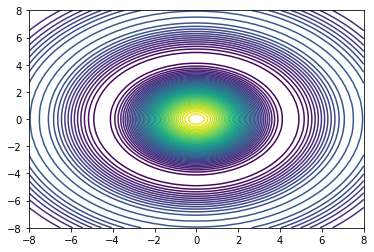

In [54]:
z = tf.sqrt(x ** 2 + y ** 2)
z = tf.sin(z)/z
import matplotlib.pyplot as plt
fig = plt.figure()
plt.contour(x.numpy(), y.numpy(), z.numpy(), 50)
plt.show()

### 6.6 加载经典数据集
- Boston Housing 回归模型训练
- CIFAR10/100 图片分类任务
- MNIST/Fashion_MNIST 图片分类任务
- IMDB 情感分类任务

In [55]:
# 导入mnist数据集
# (x_train ,y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [56]:
# 将数据转换成dataset格式
# train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))

### 6.7 随机打散

In [57]:
# 通过data.shuffle()进行打散。
# train_data = train_data.shuffle(10000)

### 6.8 批训练

In [58]:
# 设置batch_size = 128，即一次并行计算128个样本的数据，一般根据GPU资源设置。
# train_data = train_data.batch(128)